In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import os
import math
import numpy as np


# We need to add "dim,simulation_badget,key,Transitions,C2ST"

/tmp/ipykernel_1458179/2579573644.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, i].set_xticklabels(["$10^0$", "$10^1$", "$10^2$"])
/tmp/ipykernel_1458179/2579573644.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, i].set_xticklabels(["$10^0$", "$10^1$", "$10^2$"])
/tmp/ipykernel_1458179/2579573644.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1, i].set_xticklabels(["$10^0$", "$10^1$", "$10^2$"])
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
f

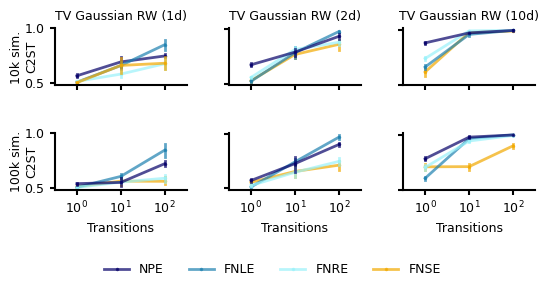

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following famil

In [19]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

from markovsbi.bm.plot_utils import use_style

# Constants 
col_size = 1.5 
row_size = 1.3 
dim = 2 
DEFAULT_COLORS = {"nle": "#1e81b0", "nre": "#9bf2fa", "diffusion": "#f2a900", "npe": "#060169"} 

dim_list = [1, 2, 10] 
sim_badget_list = [10000, 100000] 

# Load CSVs 
file_path = "../../notebooks/benchmark_tests_nonstationary/" 
csv_files = { "Pro": "Nonstationary_Proposal.csv", "NLE": "Nonstationary_NLE.csv", "NRE": "Nonstationary_NRE.csv", "NPE": "Nonstationary_NPE.csv" } 
csv_data = {name: pd.read_csv(f"{file_path}{csv_file}", encoding="ms932") for name, csv_file in csv_files.items()} 

# Adjust 'Transitions' 
for data in csv_data.values(): 
    data['Transitions'] -= 1 
    

# Function to plot data 

def plot_point(ax, data, dim, sim_budget, color, label=None): 
    sns.pointplot( x="Transitions", y="C2ST", data=data[(data['dim'] == dim) & (data['simulation_badget'] == sim_budget)], ax=ax, marker=".", dodge=False, color=color, alpha=0.7, markersize=2., lw=2., label=label )
    
with use_style("pyloric"):
    # Create subplots 
    fig, ax = plt.subplots(2, 3, figsize=(6, 3)) 

    # Set labels and titles 
    for i in range(3): 
        ax[0, i].set_title(f"TV Gaussian RW ({dim_list[i]}d)") 
        ax[0, i].set_xticklabels([]) 
        ax[1, i].set_xticklabels(["$10^0$", "$10^1$", "$10^2$"]) 
        ax[0, 0].set_ylabel("10k sim.\nC2ST", labelpad=-10) 
        ax[1, 0].set_ylabel("100k sim.\nC2ST", labelpad=-10) 
        
    # Plot data 
    for i in range(3): 
        for j in range(2): 
            if i == 0 and j== 0:
                sim_budget = sim_badget_list[j] 
                plot_point(ax[j, i], csv_data["NPE"], dim_list[i], sim_budget, DEFAULT_COLORS["npe"], label= "NPE")
                plot_point(ax[j, i], csv_data["NLE"], dim_list[i], sim_budget, DEFAULT_COLORS["nle"], label= "FNLE") 
                plot_point(ax[j, i], csv_data["NRE"], dim_list[i], sim_budget, DEFAULT_COLORS["nre"], label= "FNRE") 
                plot_point(ax[j, i], csv_data["Pro"], dim_list[i], sim_budget, DEFAULT_COLORS["diffusion"], label= "FNSE") 

                ax[j, i].get_legend().remove() 
                
                plt.subplots_adjust(hspace=0.05, wspace=0.1) 
            else:

                sim_budget = sim_badget_list[j] 
                plot_point(ax[j, i], csv_data["Pro"], dim_list[i], sim_budget, DEFAULT_COLORS["diffusion"]) 
                plot_point(ax[j, i], csv_data["NLE"], dim_list[i], sim_budget, DEFAULT_COLORS["nle"]) 
                plot_point(ax[j, i], csv_data["NRE"], dim_list[i], sim_budget, DEFAULT_COLORS["nre"]) 
                plot_point(ax[j, i], csv_data["NPE"], dim_list[i], sim_budget, DEFAULT_COLORS["npe"])
                
                # Remove legends and adjust layout 
                #ax[0, 2].get_legend().remove() 
                
                plt.subplots_adjust(hspace=0.05, wspace=0.1) 

            
            
            
    # Set y-ticks and labels 
    for i in range(3): 
        for j in range(2):
            ax[j, i].set_yticklabels([]) 
            ax[j, i].set_yticks([0.5, 1.0]) 
            
            ax[0, i].set_xlabel("") 

    ax[0, 0].set_yticklabels(["$0.5$", "$1.0$"]) 
    ax[1, 0].set_yticklabels(["$0.5$", "$1.0$"]) 

    for i in range(2): 
        for j in range(2):
            ax[j, 0].set_yticklabels([]) 
            ax[j, i].set_yticks([0.5, 1.0]) 
            ax[0, 0].set_yticklabels(["$0.5$", "$1.0$"]) 
            ax[1, 0].set_yticklabels(["$0.5$", "$1.0$"]) 
            ax[j, i+1].set_ylabel("") 
        


    fig.legend(fontsize=9, ncol=10, loc="lower center", bbox_to_anchor=[0.5, -0.05]) 
    plt.rcParams["font.size"] = 25 
    plt.tight_layout() 
    plt.show() 
    fig.savefig("appendix_time_proposal.svg")